In [1]:
!pip install tqdm


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk


In [3]:
plt.style.use('ggplot')

df=pd.read_csv('/kaggle/input/amazon-fine-food-reviews/Reviews.csv')#veri okuma
df=df.head(10)
df


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


<Axes: title={'center': 'Birden beşe kadar olan bütün puanların toplam oylamalari'}, xlabel='Score'>

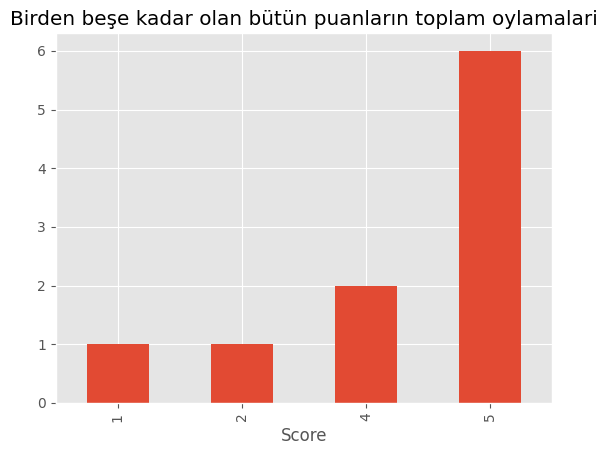

In [4]:
df['Score'].value_counts().sort_index().plot(kind="bar",title="Birden beşe kadar olan bütün puanların toplam oylamalari")


# Basic NLTK 

In [5]:
example=df['Text'][1] #1. satırdaki text sütunundaki cümleyi alır
example

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

In [6]:
word_tokens=nltk.word_tokenize(example) #Cümleyi kelimelere ayırır

In [7]:
tagged=nltk.pos_tag(word_tokens) #Bu etiketler, her kelimenin cümledeki dilbilgisel rolünü (isim, fiil, sıfat, edat vb.) belirtir.

In [8]:
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (GPE Product/NNP)
  arrived/VBD
  labeled/VBN
  as/IN
  (PERSON Jumbo/NNP Salted/NNP Peanuts/NNP)
  .../:
  the/DT
  peanuts/NNS
  were/VBD
  actually/RB
  small/JJ
  sized/VBN
  unsalted/JJ
  ./.
  Not/RB
  sure/JJ
  if/IN
  this/DT
  was/VBD
  an/DT
  error/NN
  or/CC
  if/IN
  the/DT
  vendor/NN
  intended/VBN
  to/TO
  represent/VB
  the/DT
  product/NN
  as/IN
  ``/``
  Jumbo/NNP
  ''/''
  ./.)


# Step 1. VADER Seniment Scoring
  NLTK'nin SentimentIntensityAnalyzer'ını kullanarak metnin negatif (neg), nötr (neu) ve pozitif (pos) puanlarını elde edeceğiz.

      * Bu, "bag of words" (kelime torbası) yaklaşımını kullanır:

          1.  Stop words (önemsiz kelimeler) kaldırılır.
          2. Her kelime puanlanır ve toplam bir puan oluşturmak için birleştirilir.

In [9]:
from nltk.sentiment  import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm


/usr/local/lib/python3.10/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [10]:
sia=SentimentIntensityAnalyzer()
sia.polarity_scores("I am so happy")

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [11]:
sia.polarity_scores("the is the worst thing ever")

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [12]:
sia.polarity_scores(example)

{'neg': 0.079, 'neu': 0.853, 'pos': 0.068, 'compound': -0.1027}

In [13]:
res={} #
for i,row in tqdm(df.iterrows(),total=len(df)):
    id=row['Id']
    text=row['Text']
    res[id]=sia.polarity_scores(text)
    

 





  0%|          | 0/10 [00:00<?, ?it/s]

In [14]:
vaders= pd.DataFrame(res).T #transpoze alıyoruz
vaders=vaders.reset_index().rename(columns={"index":"Id"})
# 'vaders' DataFrame'ini 'df' ile birleştiriyoruz
vaders = vaders.merge( df,how='left', on='Id')

# Sonuçları görüntüleme
vaders=pd.DataFrame(vaders)
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.079,0.853,0.068,-0.1027,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,0.029,0.809,0.163,0.8830,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,0.034,0.693,0.273,0.9346,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,0.000,0.520,0.480,0.9487,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,0.000,0.851,0.149,0.6369,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,0.000,0.705,0.295,0.8313,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [15]:
pd.DataFrame(vaders,columns=["Id","Score","compound"])

,Id,Score,compound
0,1,5,0.9441
1,2,1,-0.1027
2,3,4,0.8265
3,4,2,0.0000
4,5,5,0.9468
5,6,4,0.8830
6,7,5,0.9346
7,8,5,0.9487
8,9,5,0.6369
9,10,5,0.8313


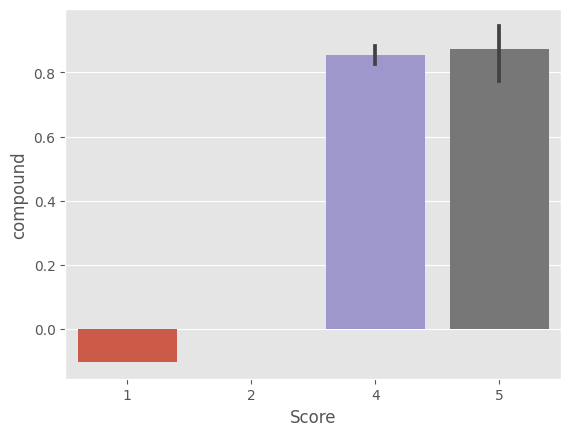

In [16]:
ax=sns.barplot(data=vaders,x='Score',y='compound') #yıldız skorlarının bileşik puanı
plt.show()

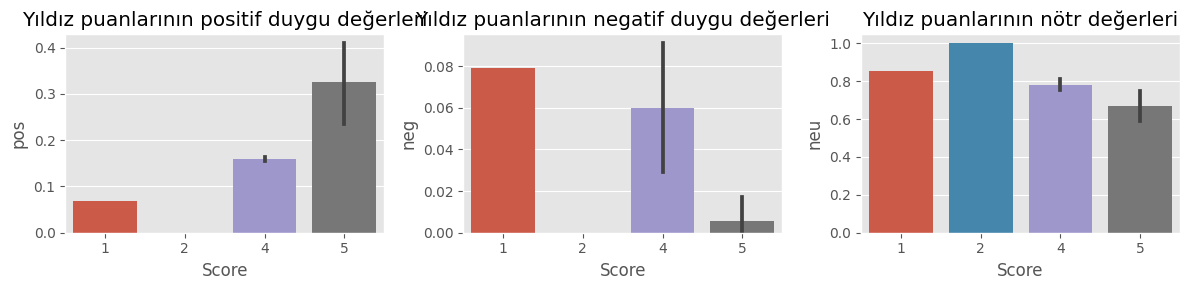

In [17]:
fig,axs=plt.subplots(1,3,figsize=(12,3))
sns.barplot(data=vaders,x='Score',y='pos',ax=axs[0]).set_title("Yıldız puanlarının positif duygu değerleri")
sns.barplot(data=vaders,x='Score',y='neg',ax=axs[1]).set_title("Yıldız puanlarının negatif duygu değerleri")
sns.barplot(data=vaders,x='Score',y='neu',ax=axs[2]).set_title("Yıldız puanlarının nötr değerleri")
plt.tight_layout()  # Grafiklerin birbirine girmesini önler

# Roberta Pretrained Model